In [1]:
#How to Build a Real Estate Price Prediction Model?

#https://www.analyticsvidhya.com/blog/2023/02/how-to-build-a-real-estate-price-prediction-model/?utm_source=related_WP&utm_medium=https://www.analyticsvidhya.com/blog/2022/01/different-types-of-regression-models/

In [4]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv('train.csv')
# Displaying all the columns in the dataset
pd.set_option('display.max_columns', None)
print(data.head())

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7          

In [12]:
#Missing Values
# Making a list of columns with missing values
missing_values = [col for col in data.columns if data[col].isnull().any()]
# Printing the number of missing values and percentage of missing values in each column
for col in missing_values:
    print(col,round(data[col].isnull().mean(),3), '% missing values')

LotFrontage 0.177 % missing values
Alley 0.938 % missing values
MasVnrType 0.005 % missing values
MasVnrArea 0.005 % missing values
BsmtQual 0.025 % missing values
BsmtCond 0.025 % missing values
BsmtExposure 0.026 % missing values
BsmtFinType1 0.025 % missing values
BsmtFinType2 0.026 % missing values
Electrical 0.001 % missing values
FireplaceQu 0.473 % missing values
GarageType 0.055 % missing values
GarageYrBlt 0.055 % missing values
GarageFinish 0.055 % missing values
GarageQual 0.055 % missing values
GarageCond 0.055 % missing values
PoolQC 0.995 % missing values
Fence 0.808 % missing values
MiscFeature 0.963 % missing values


In [13]:
#Handling the Missing Values
# Dropping the columns with more than 15% missing values
data.drop(['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], axis=1, inplace=True)
# Filling the missing values in the remaining columns with the most frequent value
new_missing_values = [col for col in data.columns if data[col].isnull().any()]
for col in new_missing_values:
    if data[col].dtype == 'O':
        data[col].fillna(data[col].mode()[0], inplace=True)
    else:
        data[col].fillna(data[col].median(), inplace=True)

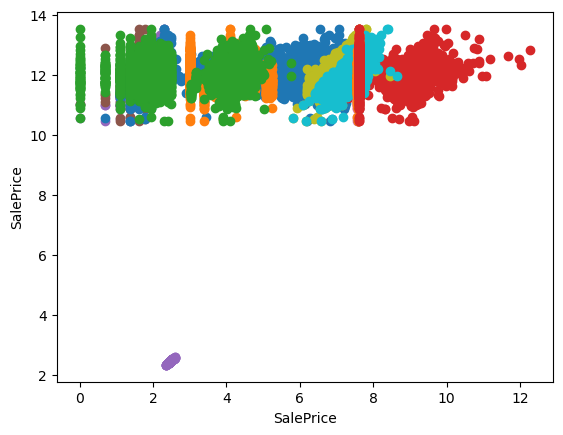

In [18]:
#Outliers
continuous_features = [col for col in data.columns if data[col].dtype != 'O']
for col in continuous_features:
      data_copy = data.copy()
      if 0 in data_copy[col].unique():
            pass
      else:
            data_copy[col] = np.log(data_copy[col])
            data_copy['SalePrice'] = np.log(data_copy['SalePrice'])
            plt.scatter(data_copy[col], data_copy['SalePrice'])
            plt.xlabel(col)
            plt.ylabel('SalePrice')

C:\Users\DELL\AppData\Local\Temp\ipykernel_18680\2666881775.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr()[['SalePrice']].sort_values(by='SalePrice', ascending=False), annot=True, cmap='viridis')


<Axes: >

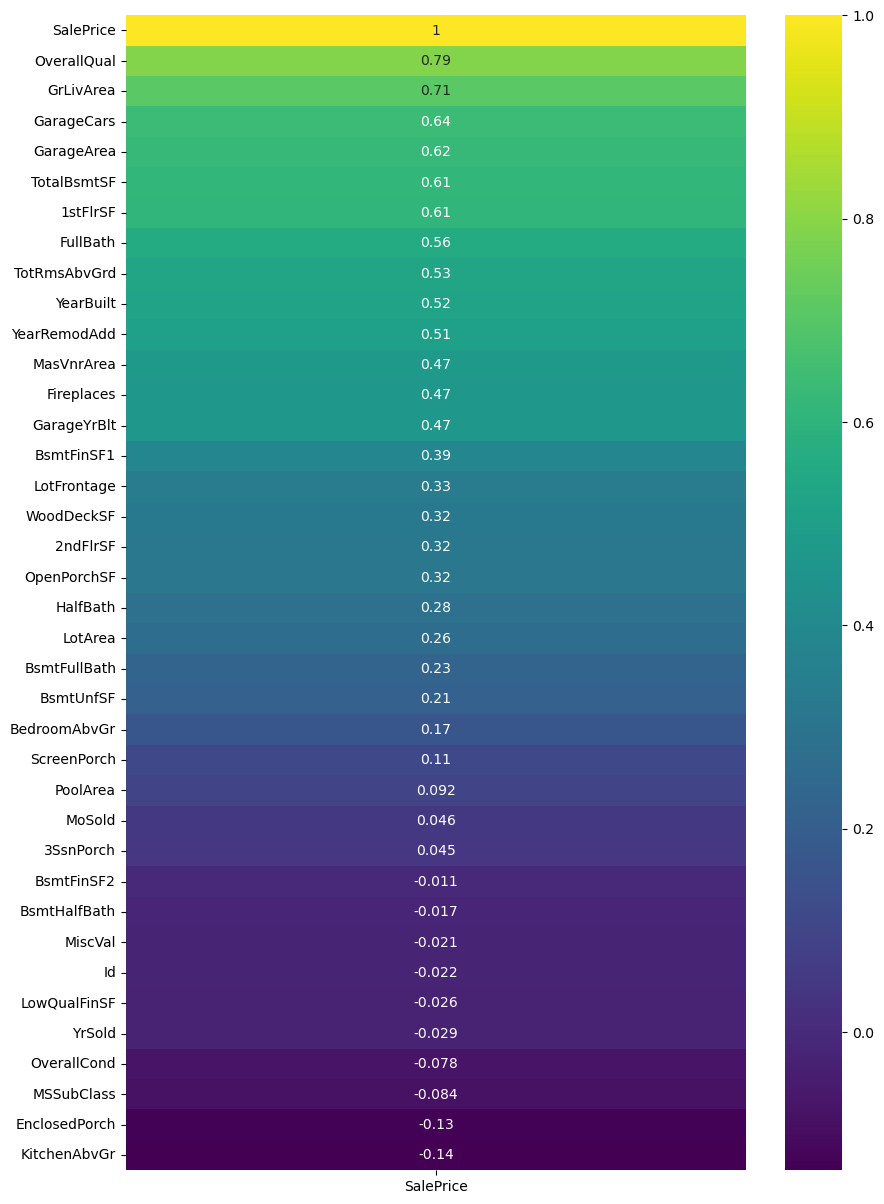

In [20]:
#Exploratory Data Analysis
plt.figure(figsize=(10, 15))
# Plotting the heatmap with respect to the correlation of the features with the target variable 'SalePrice'
sns.heatmap(data.corr()[['SalePrice']].sort_values(by='SalePrice', ascending=False), annot=True, cmap='viridis')

In [21]:
#We can see that ‘OverallQual,’ ‘GrLivArea,’ and ‘TotalBsmtSF’ strongly correlate with ‘SalePrice.’ Check the below scatter plots.

C:\Users\DELL\AppData\Local\Temp\ipykernel_18680\141466021.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  for col in data.corr()[data.corr()['SalePrice'] > 0.5].index:


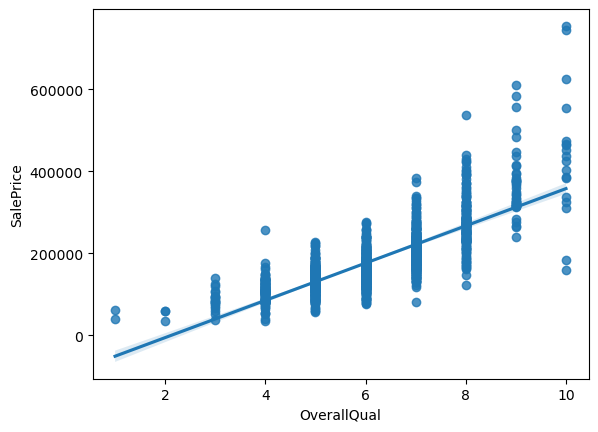

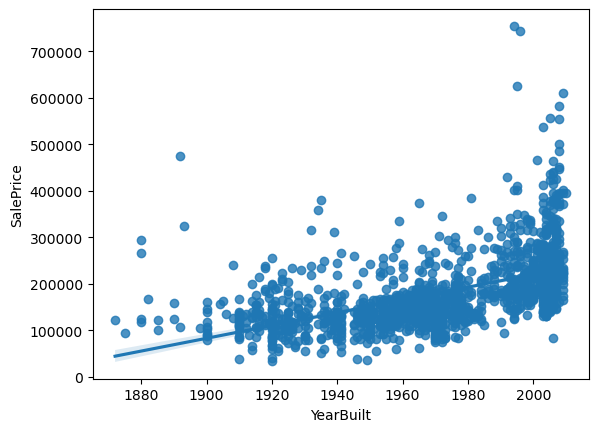

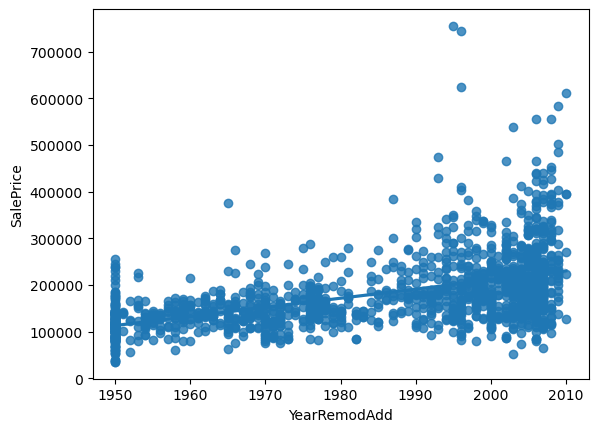

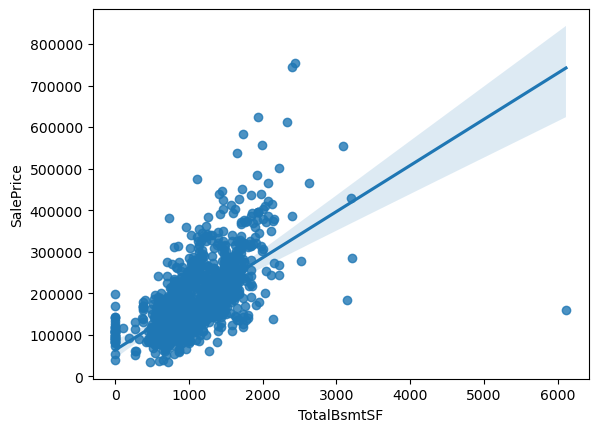

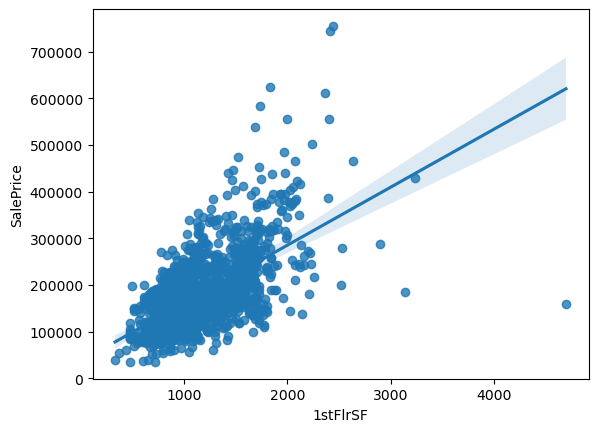

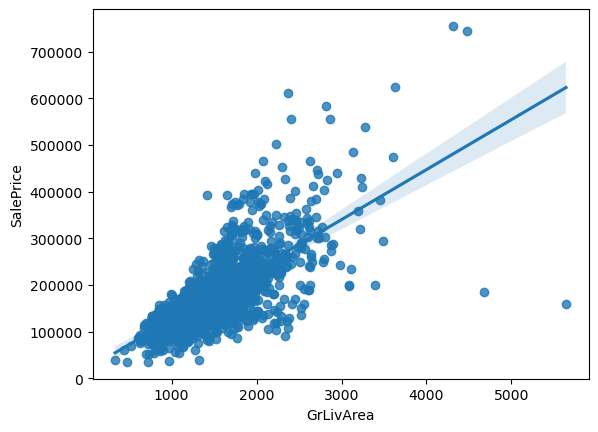

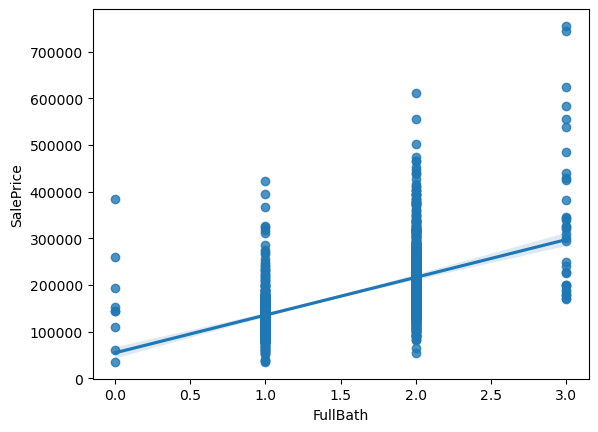

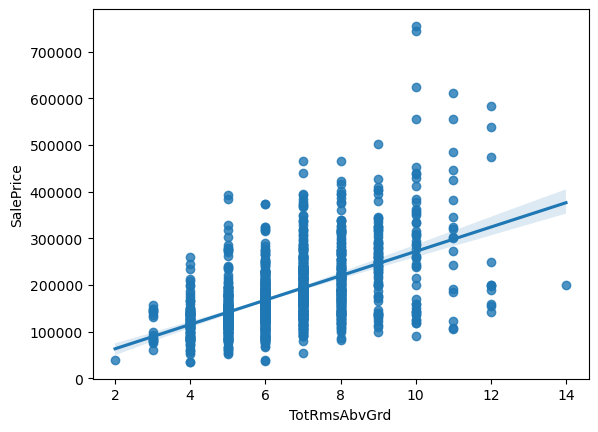

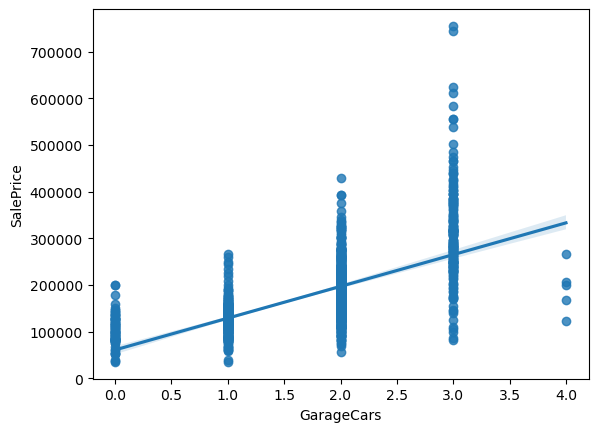

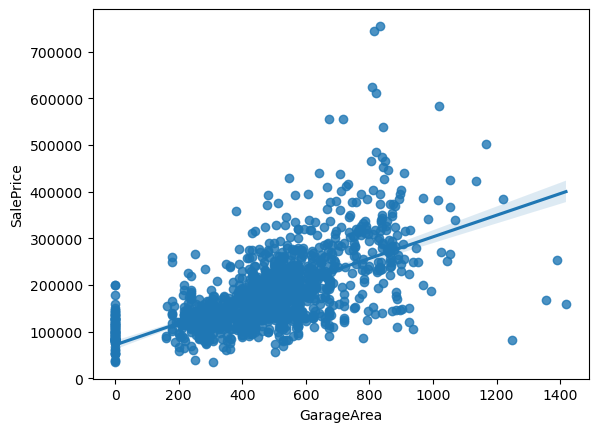

In [22]:
# Regression plot between the target variable and the most correlated variables who have a correlation greater than 0.5 
for col in data.corr()[data.corr()['SalePrice'] > 0.5].index:
    if col == 'SalePrice':
        pass
    else:
        sns.regplot(x=data[col], y=data['SalePrice'])
        plt.show()

In [23]:
#All the features have a positive correlation with the target variable.

In [24]:
#Model Development
#Now that we have cleaned and visualized the data. 
#The next step is to build a model to predict the sale price of a house.
#Several different prediction models can be used, including multiple linear regression, KNN regressor, etc. 
#We will use a series of models and pipelines to find the best model by evaluating the model’s accuracy, precision, and recall.
#I will also use cross-validation to ensure that the model is generalizing well

In [25]:
# Encoding the categorical variables to the numeric datatype
from sklearn.preprocessing import LabelEncoder
for col in data.columns:
    if data[col].dtype == 'O':
        label_encoder = LabelEncoder()
        data[col] = label_encoder.fit_transform(data[col])

In [26]:
# Let's use Ridge Regression to build the model
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
# create X and y variables from Features and target variable
X = data[['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd']]
y = data['SalePrice']

In [27]:
# Function to perform ridge regression
def ridge_regression(alpha, data):
    ridge = Ridge(alpha=alpha)
    ridge.fit(X, y)
    scores = cross_val_score(ridge, X, y, scoring='neg_mean_squared_error', cv=5)
    rmse = np.sqrt(-scores)
    return rmse
# Finding the best value of hyper-parameter of Ridge - alpha
alpha = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
for i in alpha:
    print('Alpha: ', i)
    print('Mean RMSE: ', ridge_regression(i, data).mean())
    print('Standard Deviation: ', ridge_regression(i, data).std())
    print()

Alpha:  0.001
Mean RMSE:  38573.17915586522
Standard Deviation:  6480.572630279337

Alpha:  0.01
Mean RMSE:  38573.14850466292
Standard Deviation:  6480.586761912227

Alpha:  0.1
Mean RMSE:  38572.842403513685
Standard Deviation:  6480.72806585962

Alpha:  1
Mean RMSE:  38569.82207161947
Standard Deviation:  6482.139881236081

Alpha:  10
Mean RMSE:  38543.31646171237
Standard Deviation:  6496.147296560686

Alpha:  100
Mean RMSE:  38464.987089406866
Standard Deviation:  6627.229961041578

Alpha:  1000
Mean RMSE:  39410.00389009513
Standard Deviation:  7170.462140729528



In [28]:
#For alpha = 100, the RMSE is the lowest, and the model performs the best. 
#The RMSE is 38464. The model is performing the best with alpha = 100.
# I will be using the ridge regression model with alpha = 100 
ridge = Ridge(alpha=100)
ridge.fit(X, y)

Ridge(alpha=100)

In [29]:
# Loading the test data
test_data = pd.read_csv('test.csv')
# Doing all the changes that were done in the training data
test_data.drop(['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], axis=1, inplace=True)
new_missing_values = [col for col in test_data.columns if test_data[col].isnull().any()]
for col in new_missing_values:
    if test_data[col].dtype == 'O':
        test_data[col].fillna(test_data[col].mode()[0], inplace=True)
    else:
        test_data[col].fillna(test_data[col].median(), inplace=True)

In [30]:
# Encoding the categorical variables of test data
for col in test_data.columns:
    if test_data[col].dtype == 'O':
        label_encoder = LabelEncoder()
        test_data[col] = label_encoder.fit_transform(test_data[col])

In [31]:
# Selecting Features
X_test = test_data[['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd']]
# Predicting the target variable
y_pred = ridge.predict(X_test)

In [32]:
# Saving the predictions in a csv file
output = pd.DataFrame({'Id': test_data.Id, 'SalePrice': y_pred})
output.to_csv('my_submission.csv', index=False)

Conclusion
In this article, we have chosen the Ames housing dataset as the price prediction model, understand the problem statement, and perform Exploratory Data Analysis. We have also performed missing value imputation and encoding of categorical variables on the train and test data sets. Then we applied Ridge regression with different alpha values and found the best value of alpha to minimize the RMSE.

Key Takeaways:

Three features, ‘OverallQual,’ ‘GrLivArea,’ and ‘TotalBsmtSF,’ were found to have strong positive correlations with the target variable ‘SalePrice.’
The model performed best with alpha = 100, resulting in amses of 38464.
The analysis showed the importance of considering multiple features in real estate price prediction models.
Regularization techniques like Ridge regression can reduce the model’s complexity and prevent overfitting.
The results of this project highlight the potential for using data science in real estate to make more informed decisions and improve predictions.